In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


bias = 0.3
weight = 0.7

# create our dataset
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

# we'll get the 80% for training 
# we'll get the rest 20% for testing 
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

#len(X_train), len(y_train), len(X_test), len(y_test)


Let's visualiaze our data

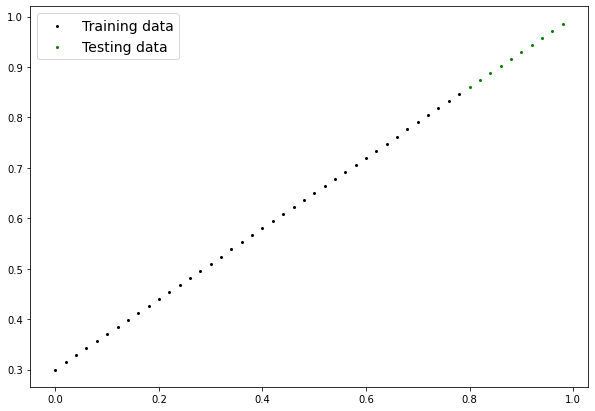

In [ ]:
def plot_data_and_predictions(train_data=X_train,
                              train_labels=y_train,
                              test_data=X_test,
                              test_labels=y_test,
                              predictions=None):
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="black", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if(predictions is not None):
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  plt.legend(prop={
      "size": 14
  })

plot_data_and_predictions()
  

My first ever Machine Learning model

In [ ]:
class LinearRegressionModel(nn.Module):
  # almost everything in PyTorch inherhits from nn.Module, so we have to ... let's say 'include' it
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [ ]:
torch.manual_seed(42)

my_model = LinearRegressionModel()
#Let's check the parameters
#list(my_model.parameters())

my_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

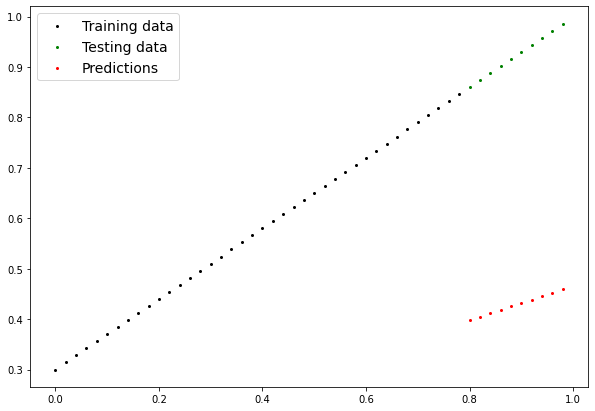

In [ ]:
with torch.inference_mode():
  y_preds = my_model(X_test)
y_preds

plot_data_and_predictions(predictions=y_preds)

Setup a loss function

In [ ]:
loss_fn = nn.L1Loss()

Setup an optimizer (Stochastic Gradient Descent)
with learning rate to be 0.01

(the larger  the learing rate the more dangerous it is)

(the smaller the learing rate the safer but slower it is)

Learning rate has to be neither too large nor too small.

In [ ]:
optimizer = torch.optim.SGD(params=my_model.parameters(), lr=0.01)

Building a training loop (and a testing loop)

Because we set the learning rate to 0.01 it means that we need more iterations than if you did selected lr=0.1

In [ ]:
epochs = 700
for epoch in range(epochs):
  my_model.train()

  y_pred = my_model(X_train)
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}  ==  epoch={epoch}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(my_model.state_dict())
  #my_model.eval()

Loss : 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss : 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss : 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss : 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss : 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss : 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss : 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss : 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss : 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss : 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tenso

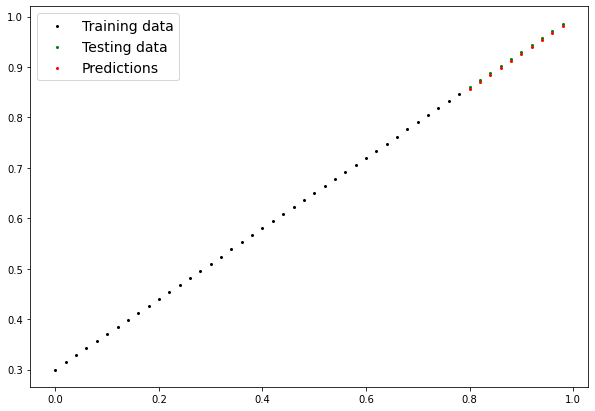

In [ ]:
my_model.state_dict()

with torch.inference_mode():
  y_preds = my_model(X_test)
y_preds

plot_data_and_predictions(predictions=y_preds)

As we can see from the print commands in the for loop after epoch=169 the loss of our model is always either 

Loss : 0.0025885067880153656 or Loss : 0.008932482451200485

It means that after that number of iterations the model is quite good and no more improvement is able to be done.

The parameters as we can clearly check is:

weights = tensor([0.6951]) and

bias = tensor([0.2993])